## 3-1

In [308]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Model
from tensorflow.keras.datasets import fashion_mnist


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [309]:
x_train = x_train.reshape( 60000, 784 )
x_test = x_test.reshape( 10000, 784 )
x_train = x_train.astype( np.float32 )/255.0
x_test = x_test.astype( np.float32 )/255.0
y_train = tf.keras.utils.to_categorical( y_train, 10 )
y_test = tf.keras.utils.to_categorical( y_test, 10 )

In [310]:
y_train.shape, x_train.shape

((60000, 10), (60000, 784))

## 3-2

In [291]:
input_layer = keras.Input(
    shape = (x_train.shape[1]),
    name = 'Input_Layer'
)
hidden_Layer_1 = keras.layers.Dense(
    units = 1024,
    kernel_initializer='he_uniform',
    activation = 'ReLU',
    bias_initializer = keras.initializers.Constant(0),
    name = 'Hidden_Layer_1'
)(input_layer)
hidden_Layer_2 = keras.layers.Dense(
    units = 512,
    kernel_initializer='he_uniform',
    activation = 'ReLU',
    bias_initializer = keras.initializers.Constant(0),
    name = 'Hidden_Layer_2'
)(hidden_Layer_1)
hidden_Layer_3 = keras.layers.Dense(
    units = 512,
    kernel_initializer='he_uniform',
    activation = 'ReLU',
    bias_initializer = keras.initializers.Constant(0),
    name = 'Hidden_Layer_3'
)(hidden_Layer_2)
hidden_Layer_4 = keras.layers.Dense(
    units = 512,
    kernel_initializer='he_uniform',
    activation = 'ReLU',
    bias_initializer = keras.initializers.Constant(0),
    name = 'Hidden_Layer_4'
)(hidden_Layer_3)
output_layer = keras.layers.Dense(
    units = 10,
    name = 'Output_Layer',
    activation='softmax'
)(hidden_Layer_4)

model = Model(input_layer, output_layer, name='Fashion_Classifying_Model')
model.summary()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

#rlr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, min_lr=1e-5, verbose=1, patience=5)
es = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1e-5, patience=10, restore_best_weights=True, verbose=1)
callback_list = [es]
history = model.fit(x_train, y_train,\
                    batch_size=500, epochs=1000, verbose=0,\
                    callbacks=callback_list, validation_split=0.2)

Model: "Fashion_Classifying_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 784)]             0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 1024)              803840    
                                                                 
 Hidden_Layer_2 (Dense)      (None, 512)               524800    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 512)               262656    
                                                                 
 Hidden_Layer_4 (Dense)      (None, 512)               262656    
                                                                 
 Output_Layer (Dense)        (None, 10)                5130      
                                                                 
Total params: 1,859,082
Trainable params:

2022-11-11 20:45:33.947743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-11 20:45:35.849880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch: 99.
Epoch 109: early stopping


In [318]:
def model_create (df):
        
    input_layer = keras.Input(
        shape = (df.shape[1]),
        name = 'Input_Layer'
    )
    hidden_Layer_1 = keras.layers.Dense(
        units = 1024,
        kernel_initializer='he_uniform',
        activation = 'ReLU',
        bias_initializer = keras.initializers.Constant(0),
        name = 'Hidden_Layer_1'
    )(input_layer)
    hidden_Layer_2 = keras.layers.Dense(
        units = 512,
        kernel_initializer='he_uniform',
        activation = 'ReLU',
        bias_initializer = keras.initializers.Constant(0),
        name = 'Hidden_Layer_2'
    )(hidden_Layer_1)
    hidden_Layer_3 = keras.layers.Dense(
        units = 512,
        kernel_initializer='he_uniform',
        activation = 'ReLU',
        bias_initializer = keras.initializers.Constant(0),
        name = 'Hidden_Layer_3'
    )(hidden_Layer_2)
    hidden_Layer_4 = keras.layers.Dense(
        units = 512,
        kernel_initializer='he_uniform',
        activation = 'ReLU',
        bias_initializer = keras.initializers.Constant(0),
        name = 'Hidden_Layer_4'
    )(hidden_Layer_3)
    output_layer = keras.layers.Dense(
        units = 10,
        name = 'Output_Layer',
        activation='softmax'
    )(hidden_Layer_4)

    model = Model(input_layer, output_layer, name='Fashion_Classifying_Model')
    
    return model


def various_opt_result (model, method, x_df, y_df):

    if method == 'momentum':
        opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

        rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_lr=1e-5, verbose=1, patience=5)
        es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, restore_best_weights=True, verbose=1)
        callback_list = [rlr, es]
    elif method == 'nesterov':
        opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

        rlr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_lr=1e-5, verbose=1, patience=5)
        es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, restore_best_weights=True, verbose=1)
        callback_list = [rlr, es]
    elif method == 'adagrad':
        opt = keras.optimizers.Adagrad(learning_rate=0.001)

        es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, restore_best_weights=True, verbose=1)
        callback_list = [es]
    elif method == 'rmsprop':
        opt = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

        es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, restore_best_weights=True, verbose=1)
        callback_list = [es]
    elif method == 'adam':
        opt = keras.optimizers.Adam(learning_rate=0.001)

        es = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=10, restore_best_weights=True, verbose=1)
        callback_list = [es]

    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    x_train_r, x_val_r, y_train_r, y_val_r = train_test_split(x_df, y_df, train_size=0.8, test_size=0.2, random_state=11, shuffle=True)

    history = model.fit(x_train_r, y_train_r,\
                        batch_size=500, epochs=1000, verbose=2,\
                        callbacks=callback_list, validation_data=(x_val_r, y_val_r))

    acc = model.evaluate(x_test, y_test)

    return acc, history

# 3-3

In [319]:
opt_list = ['momentum', 'nesterov', 'adagrad', 'rmsprop', 'adam']
opt_list_result = []
acc_result = []

for opt in opt_list:

    model = model_create(x_train)
    acc, reg = various_opt_result(model, opt, x_train, y_train)
    opt_list_result.append(reg)
    acc_result.append(acc)

Epoch 1/1000


2022-11-11 21:15:47.390949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-11 21:15:49.042277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 - 2s - loss: 1.2444 - accuracy: 0.6198 - val_loss: 0.7649 - val_accuracy: 0.7636 - lr: 0.0010 - 2s/epoch - 22ms/step
Epoch 2/1000
96/96 - 2s - loss: 0.6792 - accuracy: 0.7801 - val_loss: 0.6177 - val_accuracy: 0.8005 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 3/1000
96/96 - 2s - loss: 0.5811 - accuracy: 0.8084 - val_loss: 0.5558 - val_accuracy: 0.8142 - lr: 0.0010 - 2s/epoch - 17ms/step
Epoch 4/1000
96/96 - 2s - loss: 0.5309 - accuracy: 0.8217 - val_loss: 0.5249 - val_accuracy: 0.8192 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 5/1000
96/96 - 2s - loss: 0.4999 - accuracy: 0.8307 - val_loss: 0.5021 - val_accuracy: 0.8309 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 6/1000
96/96 - 2s - loss: 0.4774 - accuracy: 0.8369 - val_loss: 0.4748 - val_accuracy: 0.8404 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 7/1000
96/96 - 2s - loss: 0.4597 - accuracy: 0.8417 - val_loss: 0.4572 - val_accuracy: 0.8452 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 8/1000
96/96 - 2s - loss: 0.4455 - accuracy: 0.8461 - v

2022-11-11 21:20:27.587448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 0.3452 - accuracy: 0.8811
Epoch 1/1000


2022-11-11 21:20:31.067048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-11 21:20:32.614871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 - 2s - loss: 1.2244 - accuracy: 0.6291 - val_loss: 0.7609 - val_accuracy: 0.7613 - lr: 0.0010 - 2s/epoch - 21ms/step
Epoch 2/1000
96/96 - 2s - loss: 0.6754 - accuracy: 0.7821 - val_loss: 0.6157 - val_accuracy: 0.8006 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 3/1000
96/96 - 2s - loss: 0.5787 - accuracy: 0.8087 - val_loss: 0.5510 - val_accuracy: 0.8183 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 4/1000
96/96 - 2s - loss: 0.5283 - accuracy: 0.8227 - val_loss: 0.5191 - val_accuracy: 0.8256 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 5/1000
96/96 - 2s - loss: 0.4965 - accuracy: 0.8323 - val_loss: 0.4902 - val_accuracy: 0.8343 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 6/1000
96/96 - 2s - loss: 0.4738 - accuracy: 0.8386 - val_loss: 0.4725 - val_accuracy: 0.8407 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 7/1000
96/96 - 2s - loss: 0.4565 - accuracy: 0.8430 - val_loss: 0.4615 - val_accuracy: 0.8429 - lr: 0.0010 - 2s/epoch - 16ms/step
Epoch 8/1000
96/96 - 2s - loss: 0.4430 - accuracy: 0.8480 - v

2022-11-11 21:24:02.241881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 0.3490 - accuracy: 0.8781
Epoch 1/1000


2022-11-11 21:24:05.725083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-11 21:24:07.439646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 - 2s - loss: 1.5969 - accuracy: 0.5513 - val_loss: 1.1596 - val_accuracy: 0.6892 - 2s/epoch - 23ms/step
Epoch 2/1000
96/96 - 2s - loss: 0.9953 - accuracy: 0.7169 - val_loss: 0.8773 - val_accuracy: 0.7452 - 2s/epoch - 17ms/step
Epoch 3/1000
96/96 - 2s - loss: 0.8145 - accuracy: 0.7540 - val_loss: 0.7623 - val_accuracy: 0.7665 - 2s/epoch - 17ms/step
Epoch 4/1000
96/96 - 2s - loss: 0.7273 - accuracy: 0.7736 - val_loss: 0.6977 - val_accuracy: 0.7832 - 2s/epoch - 17ms/step
Epoch 5/1000
96/96 - 2s - loss: 0.6725 - accuracy: 0.7867 - val_loss: 0.6528 - val_accuracy: 0.7918 - 2s/epoch - 16ms/step
Epoch 6/1000
96/96 - 2s - loss: 0.6338 - accuracy: 0.7965 - val_loss: 0.6214 - val_accuracy: 0.8006 - 2s/epoch - 17ms/step
Epoch 7/1000
96/96 - 2s - loss: 0.6041 - accuracy: 0.8041 - val_loss: 0.5943 - val_accuracy: 0.8083 - 2s/epoch - 16ms/step
Epoch 8/1000
96/96 - 2s - loss: 0.5807 - accuracy: 0.8105 - val_loss: 0.5736 - val_accuracy: 0.8130 - 2s/epoch - 17ms/step
Epoch 9/1000
96/96 - 2s - los

2022-11-11 21:34:10.841698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 10ms/step - loss: 0.3421 - accuracy: 0.8814
Epoch 1/1000


2022-11-11 21:34:14.472704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-11 21:34:16.821123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 - 3s - loss: 0.9344 - accuracy: 0.6906 - val_loss: 0.5237 - val_accuracy: 0.7999 - 3s/epoch - 30ms/step
Epoch 2/1000
96/96 - 2s - loss: 0.5159 - accuracy: 0.8071 - val_loss: 0.5335 - val_accuracy: 0.8091 - 2s/epoch - 19ms/step
Epoch 3/1000
96/96 - 2s - loss: 0.4478 - accuracy: 0.8342 - val_loss: 0.4935 - val_accuracy: 0.8067 - 2s/epoch - 19ms/step
Epoch 4/1000
96/96 - 2s - loss: 0.3849 - accuracy: 0.8575 - val_loss: 0.3761 - val_accuracy: 0.8582 - 2s/epoch - 18ms/step
Epoch 5/1000
96/96 - 2s - loss: 0.3636 - accuracy: 0.8642 - val_loss: 0.3460 - val_accuracy: 0.8720 - 2s/epoch - 18ms/step
Epoch 6/1000
96/96 - 2s - loss: 0.3299 - accuracy: 0.8761 - val_loss: 0.3504 - val_accuracy: 0.8708 - 2s/epoch - 19ms/step
Epoch 7/1000
96/96 - 2s - loss: 0.3151 - accuracy: 0.8798 - val_loss: 0.3527 - val_accuracy: 0.8716 - 2s/epoch - 18ms/step
Epoch 8/1000
96/96 - 2s - loss: 0.2930 - accuracy: 0.8881 - val_loss: 0.3527 - val_accuracy: 0.8824 - 2s/epoch - 18ms/step
Epoch 9/1000
96/96 - 2s - los

2022-11-11 21:34:54.468401: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 11ms/step - loss: 0.3554 - accuracy: 0.8814
Epoch 1/1000


2022-11-11 21:34:58.434428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-11 21:35:00.452328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


96/96 - 3s - loss: 0.5693 - accuracy: 0.7969 - val_loss: 0.3913 - val_accuracy: 0.8583 - 3s/epoch - 26ms/step
Epoch 2/1000
96/96 - 2s - loss: 0.3644 - accuracy: 0.8665 - val_loss: 0.3646 - val_accuracy: 0.8671 - 2s/epoch - 19ms/step
Epoch 3/1000
96/96 - 2s - loss: 0.3242 - accuracy: 0.8821 - val_loss: 0.3410 - val_accuracy: 0.8791 - 2s/epoch - 19ms/step
Epoch 4/1000
96/96 - 2s - loss: 0.2889 - accuracy: 0.8913 - val_loss: 0.3376 - val_accuracy: 0.8829 - 2s/epoch - 19ms/step
Epoch 5/1000
96/96 - 2s - loss: 0.2715 - accuracy: 0.8981 - val_loss: 0.3500 - val_accuracy: 0.8727 - 2s/epoch - 18ms/step
Epoch 6/1000
96/96 - 2s - loss: 0.2569 - accuracy: 0.9030 - val_loss: 0.3371 - val_accuracy: 0.8791 - 2s/epoch - 18ms/step
Epoch 7/1000
96/96 - 2s - loss: 0.2402 - accuracy: 0.9090 - val_loss: 0.3173 - val_accuracy: 0.8915 - 2s/epoch - 18ms/step
Epoch 8/1000
96/96 - 2s - loss: 0.2229 - accuracy: 0.9156 - val_loss: 0.3095 - val_accuracy: 0.8873 - 2s/epoch - 18ms/step
Epoch 9/1000
96/96 - 2s - los

2022-11-11 21:35:32.570873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 11ms/step - loss: 0.3210 - accuracy: 0.8898


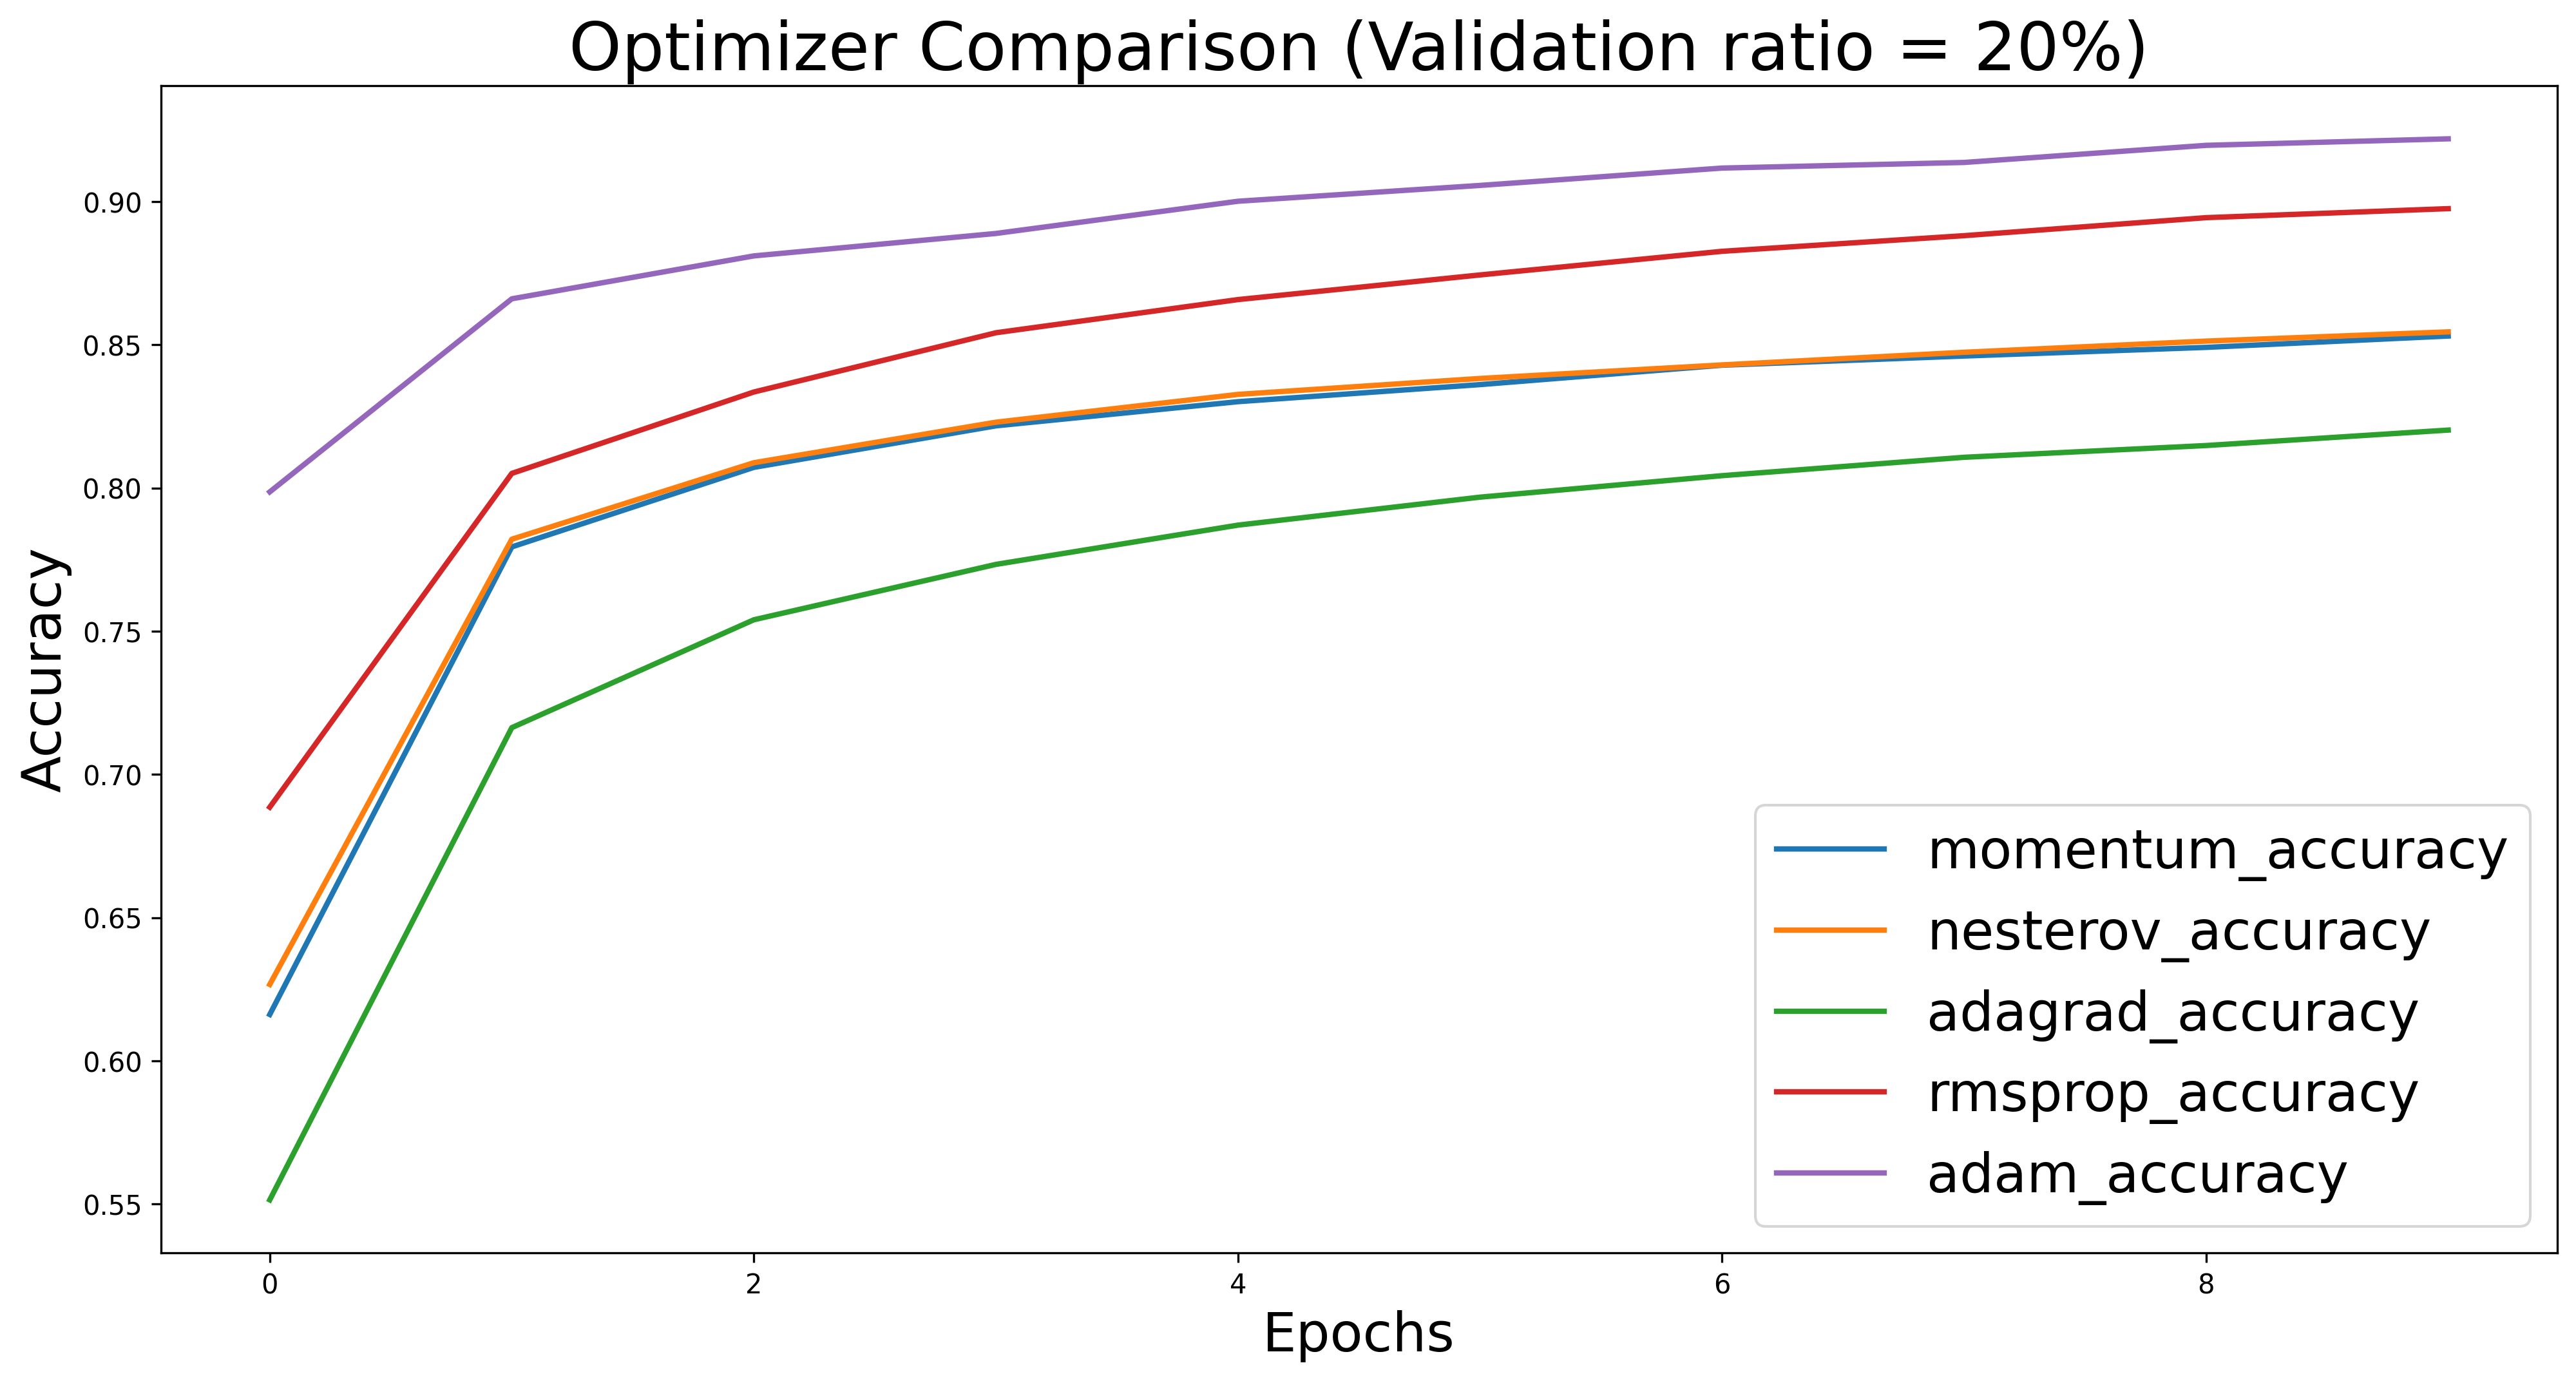

In [315]:
tmp = pd.DataFrame(data=[opt_list_result[x].history['accuracy'] for x in range(0, len(opt_list))], index=opt_list).T

plt.figure(figsize=(16, 8), facecolor='w', dpi=300)

for x in range (0, len(opt_list)):
    plt.plot(tmp.dropna().index, tmp.dropna()[opt_list[x]], label=f'{opt_list[x]}_accuracy', linewidth=2)
    plt.legend(fontsize=20)

plt.title('Optimizer Comparison (Validation ratio = 20%)', size=25)
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.show()


## 3-5 Accuracy

In [367]:
best_opt_idx = np.where(np.where(np.array(opt_list)=='adam', 1, 0)==1)[0][0]
print(f'Accuracy : {np.round(acc_result[best_opt_idx][1], 3)}')

Accuracy : 0.89
